 ## TP 5 : Markov chains & multithreading + _seaborn_

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

### A. Useful tool for visualization: _seaborn_
_seaborn_ is a package designed for nice data and data analysis visualization.
See <http://seaborn.pydata.org/examples/> for examples of nice predefined graphics. Here is a way to represent the empirical distributions of 9 realizations of a bivariate random variable with normal distribution: 

<IPython.core.display.Javascript object>


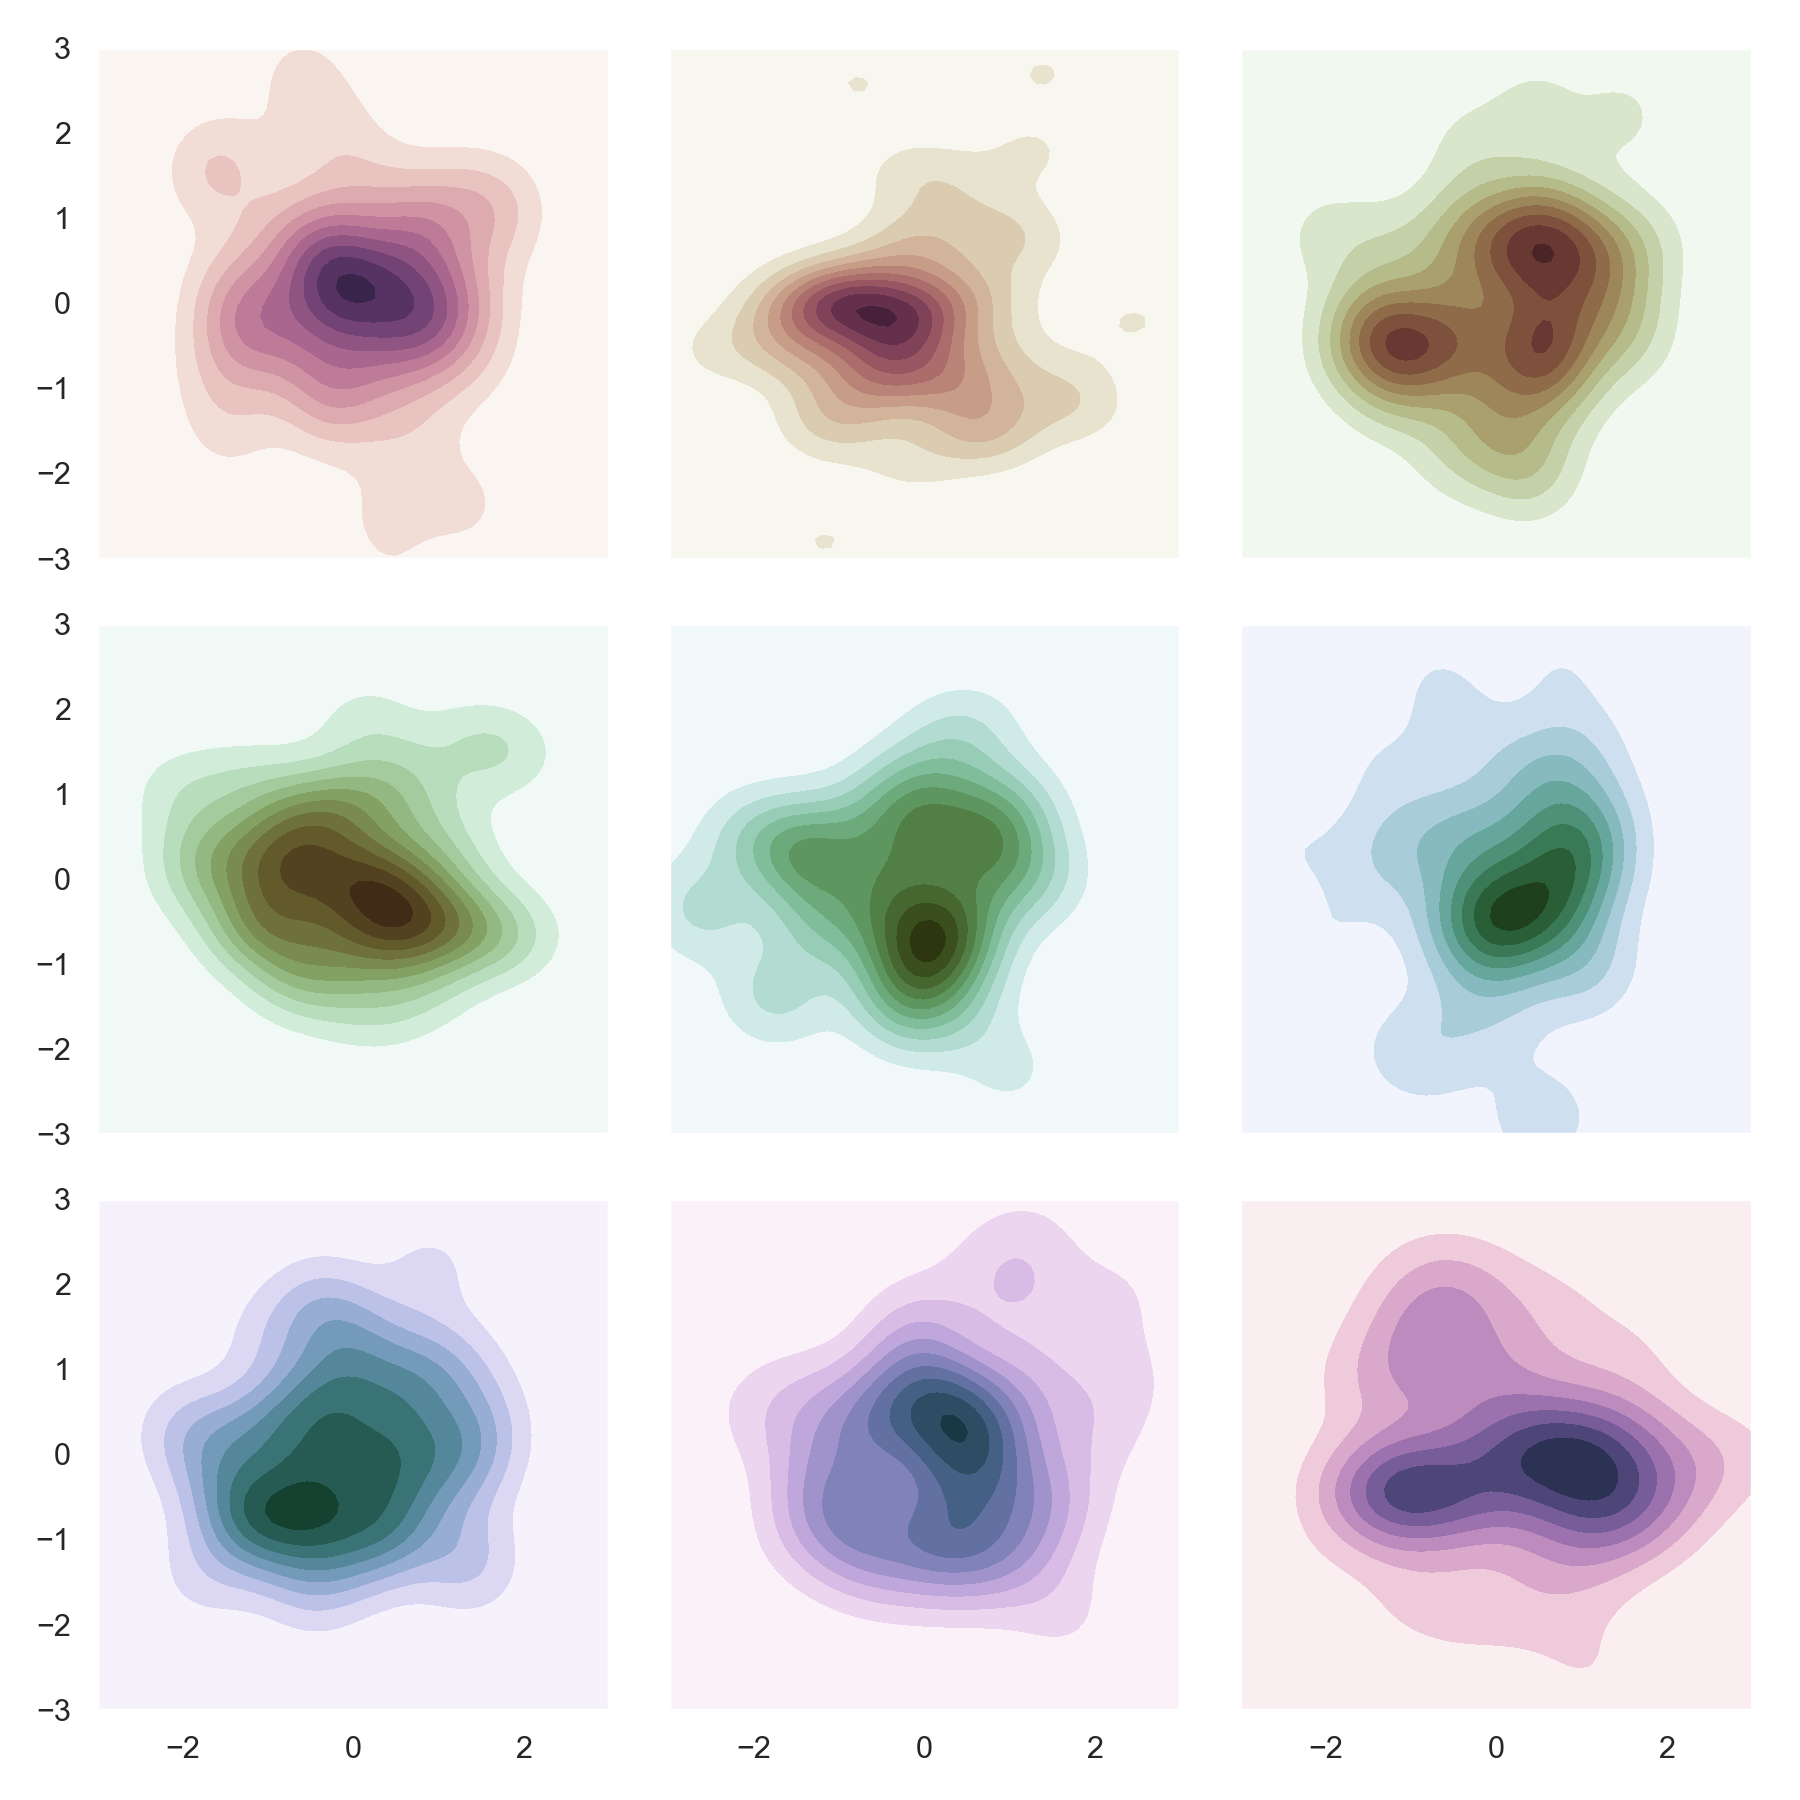

In [4]:
import seaborn as sns

sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()


### TO DO : 
**What is this example illustrating ?** (try to make each line of the code explicit, including the KDE method...)

## B. Simulation of Markov chains
Let ${(X_n)}_{n\geq 0}$ a Markov chain with values in a finite ensemble 
$E=\{x_1,\dots,x_N\}$ identified to $E=\{1,\dots,N\}$. The initial state is distributed according to:
$$
P(X_0 = k) = \rho_k,\qquad k=1\dots N.
$$
Let $A$ the transition matrix of this chain. We know that if $X_n = k$, the life time of the chain in this state obeys a geometrical law  with parameter $a_{kk}$. We also know that the probability of transition from  k to $\ell\neq k$
is given by:
$$
P(X_{n+1}=\ell | X_n=k, X_{n+1}\neq k) = \frac{a_{k\ell}}{1-a_{kk}}.
$$

### One possible algorithm to simulate a Markov chain is therefore:

   a. generate the initial state $X_0$ according to the discrete law $\{\rho_1,\dots,\rho_N\}$.
   
   b. at instant $n$, knowing that $X_n=k$,
   
   i) determine the life time $T$ in state $X_n=k$ by simulating a geometrical variable with parameter $a_{kk}$. As a consequence $X_n = \dots = X_{n+T} = k$. When $T=0$, we simply still have $X_n=k$.
   
   ii) determine next transition instant $n+T$, and determine the next state by using the probabilities of transition.

1. Implement this algorithm in a function yielding `X = Markov(N,rho,A,nmax)` where:
    - N: number of states,
    - rho: law of the initial state (vector of size $N$ summing to 1),
    - A: transition matrix (of size $N\times N$),
    - nmax: number of time steps.

2. Make some simulations using simple Markov matrices (any positive matrix $A=(a_{k\ell})$ such that lines sum to 1) and represent their evolution.

3. Explore the potential of the `multiprocessing` package to implement a multithreaded version so that several Markov chains can be simulated in parallel.

See <https://docs.python.org/2/library/multiprocessing.html>